In [1]:
from sympy import *
import numpy as np
init_printing(use_unicode = True)
%load_ext rpy2.ipython 

In [2]:
%%R
source("functionsGenerateEdge.R")

In [3]:
n, mu1, mu2, mu3, mu4, mu5, mu6, mu7, m2, m3, m4, m5, m6, m23, m24, m32, mu22, mu23, mu24, mu32, X_i, X_j, X_k, X_bar = var('n, mu1, mu2, mu3, mu4, mu5, mu6, mu7, m2, m3, m4, m5, m6, m23, m24, m32, mu22, mu23, mu24, mu32, X_i, X_j, X_k, X_bar')

In [4]:
#********************* 3rd moment ************************#

In [5]:
# m3 biased (X_i - X_bar)**3

In [6]:
%%R
### for E(m3):
paste(one_combination(c(0, 0, 1)), " - 3*", one_combination(c(1, 1)), " + 2*", one_combination(3), sep = "")
# note that parentheses are not needed here (but in general should be inserted for safety)

[1] " (1*n*mu3^1 ) / n^1 - 3* (1*n*mu3^1 ) / n^2 + 2* (1*n*mu3^1 ) / n^3"


In [7]:
# E(m3) (need to change "power" symbol)
eq1 = -m3 + (1*n*mu3**1 ) / n**1 - 3* (1*n*mu3**1 ) / n**2 + 2* (1*n*mu3**1 ) / n**3

In [8]:
# solve for mu3

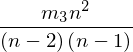

In [9]:
sol = solve(eq1, mu3)
# Unbiased estimate for mu3
sol[0].factor()

In [10]:
#********************* 4th moment ************************#

In [11]:
# m4    biased (X_i - X_bar)**4
# m2**2 biased
((X_i - X_bar)**2*(X_j - X_bar)**2).expand()

In [12]:
%%R
### for E(m4):
paste(one_combination(c(0, 0, 0, 1)), " - 4*", one_combination(c(1, 0, 1)), " + 6*", one_combination(c(2, 1)), 
      " - 3*", one_combination(4), sep = "")

[1] " (1*n*mu4^1 ) / n^1 - 4* (1*n*mu4^1 ) / n^2 + 6* (1*n*(n-1)*mu2^2 + 1*n*mu4^1 ) / n^3 - 3* (3*n*(n-1)*mu2^2 + 1*n*mu4^1 ) / n^4"


In [13]:
%%R
### for E(m2**2):
paste(one_combination(c(0, 2)), " - 2*", one_combination(c(2, 1)), " + ", one_combination(4), sep = "")

[1] " (1*n*(n-1)*mu2^2 + 1*n*mu4^1 ) / n^2 - 2* (1*n*(n-1)*mu2^2 + 1*n*mu4^1 ) / n^3 +  (3*n*(n-1)*mu2^2 + 1*n*mu4^1 ) / n^4"


In [14]:
# solve system of equations for mu4 and mu2**2

In [15]:
# E(m4)
eq1 = -m4 + (1*n*mu4**1 ) / n**1 - 4* (1*n*mu4**1 ) / n**2 + 6* (1*n*(n-1)*mu2**2 + 1*n*mu4**1 ) / n**3 - 3* (3*n*(n-1)*mu2**2 + 1*n*mu4**1 ) / n**4
# E(m2**2)
eq2 = -m2**2 + (1*n*(n-1)*mu2**2 + 1*n*mu4**1 ) / n**2 - 2* (1*n*(n-1)*mu2**2 + 1*n*mu4**1 ) / n**3 +  (3*n*(n-1)*mu2**2 + 1*n*mu4**1 ) / n**4

In [16]:
sol = solve([eq1, eq2], mu4, mu2)  # list
M4 = sol[0][0]
M2pow2 = (sol[0][1]**2)

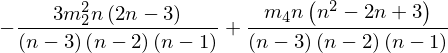

In [17]:
# Unbiased estimate for mu4
sum(list(map(factor, M4.expand().collect(m4).collect(m2).args)))

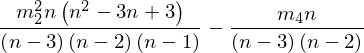

In [18]:
# Unbiased estimate for mu2**2
sum(list(map(factor, M2pow2.expand().collect(m4).collect(m2).args)))

In [19]:
#********************* 5th moment ************************#

In [20]:
# m5    biased (X_i - X_bar)**5
# m2*m3 biased
((X_i - X_bar)**2*(X_j - X_bar)**3).expand()

In [21]:
%%R
### for E(m5):
paste(one_combination(c(rep(0, 4), 1)), " - 5*", one_combination(c(1, 0, 0, 1)), " + 10*", 
      one_combination(c(2, 0, 1)), " - 10*", one_combination(c(3, 1)), " + 4*", one_combination(5), sep = "")

[1] " (1*n*mu5^1 ) / n^1 - 5* (1*n*mu5^1 ) / n^2 + 10* (1*n*(n-1)*mu3^1*mu2^1 + 1*n*mu5^1 ) / n^3 - 10* (4*n*(n-1)*mu3^1*mu2^1 + 1*n*mu5^1 ) / n^4 + 4* (10*n*(n-1)*mu3^1*mu2^1 +  1*n*mu5^1 ) / n^5"


In [22]:
%%R
### for E(m2*m3):
paste(one_combination(c(0, 1, 1)), " - ", one_combination(c(2, 0, 1)), " - 3*", one_combination(c(1, 2)), " + 5*",
      one_combination(c(3, 1)), " - 2*", one_combination(5), sep = "")

[1] " (1*n*(n-1)*mu3^1*mu2^1 + 1*n*mu5^1 ) / n^2 -  (1*n*(n-1)*mu3^1*mu2^1 + 1*n*mu5^1 ) / n^3 - 3* (2*n*(n-1)*mu3^1*mu2^1 + 1*n*mu5^1 ) / n^3 + 5* (4*n*(n-1)*mu3^1*mu2^1 + 1*n*mu5^1 ) / n^4 - 2* (10*n*(n-1)*mu3^1*mu2^1 +  1*n*mu5^1 ) / n^5"


In [23]:
# solve system of equations for mu5 and mu2*mu3

In [24]:
# E(m5)
eq1 = -m5 + (1*n*mu5**1 ) / n**1 - 5* (1*n*mu5**1 ) / n**2 + 10* (1*n*(n-1)*mu3**1*mu2**1 + 1*n*mu5**1 ) / n**3 - 10* (4*n*(n-1)*mu3**1*mu2**1 + 1*n*mu5**1 ) / n**4 + 4* (10*n*(n-1)*mu3**1*mu2**1 +  1*n*mu5**1 ) / n**5
# E(m2*m3)
eq2 = -m2*m3 + (1*n*(n-1)*mu3**1*mu2**1 + 1*n*mu5**1 ) / n**2 -  (1*n*(n-1)*mu3**1*mu2**1 + 1*n*mu5**1 ) / n**3 - 3* (2*n*(n-1)*mu3**1*mu2**1 + 1*n*mu5**1 ) / n**3 + 5* (4*n*(n-1)*mu3**1*mu2**1 + 1*n*mu5**1 ) / n**4 - 2* (10*n*(n-1)*mu3**1*mu2**1 +  1*n*mu5**1 ) / n**5

In [25]:
sol = solve([eq1, eq2], mu5, mu2*mu3)  # dictionary
M5 = sol[mu5]
M2M3 = sol[mu2*mu3]

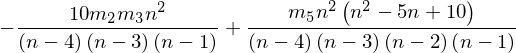

In [26]:
# Unbiased estimate for mu5
sum(list(map(factor, M5.expand().collect(m5).collect(m2*m3).args)))

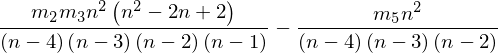

In [27]:
# Unbiased estimate for mu2*mu3
sum(list(map(factor, M2M3.expand().collect(m5).collect(m2*m3).args)))

In [28]:
#********************* 6th moment ************************#

In [29]:
# m6    biased (X_i - X_bar)**6
# m2*m4 biased
((X_i - X_bar)**2*(X_j - X_bar)**4).expand()

In [30]:
# m3**2 biased
((X_i - X_bar)**3*(X_j - X_bar)**3).expand()

In [31]:
# m2**3 biased
((X_i - X_bar)**2*(X_j - X_bar)**2*(X_k - X_bar)**2).expand()

In [32]:
%%R
### for E(m6):
paste(one_combination(c(rep(0, 5), 1)), " - 6*", one_combination(c(1, 0, 0, 0, 1)), " + 15*", 
      one_combination(c(2, 0, 0, 1)), " - 20*", one_combination(c(3, 0, 1)), " + 15*", one_combination(c(4, 1)), 
      " - 5*", one_combination(6), sep = "")

[1] " (1*n*mu6^1 ) / n^1 - 6* (1*n*mu6^1 ) / n^2 + 15* (1*n*(n-1)*mu4^1*mu2^1 + 1*n*mu6^1 ) / n^3 - 20* (3*n*(n-1)*mu4^1*mu2^1 + 1*n*(n-1)*mu3^2 + 1*n*mu6^1 ) / n^4 + 15* (3*n*(n-1)*(n-2)*mu2^3 + 7*n*(n-1)*mu4^1*mu2^1 + 4*n*(n-1)*mu3^2 + 1*n*mu6^1 ) / n^5 - 5* (15*n*(n-1)*(n-2)*mu2^3 + 15*n*(n-1)*mu4^1*mu2^1 + 10*n*(n-1)*mu3^2 +  1*n*mu6^1 ) / n^6"


In [33]:
%%R
### for E(m2*m4):
paste(one_combination(c(0, 1, 0, 1)), " - ", one_combination(c(2, 0, 0, 1)), " - 4*", one_combination(c(1, 1, 1)), 
      " + 4*", one_combination(c(3, 0, 1)), " + 6*", one_combination(c(2, 2)), " - 9*", one_combination(c(4, 1)), 
      " + 3*", one_combination(6), sep = "")

[1] " (1*n*(n-1)*mu4^1*mu2^1 + 1*n*mu6^1 ) / n^2 -  (1*n*(n-1)*mu4^1*mu2^1 + 1*n*mu6^1 ) / n^3 - 4* (1*n*(n-1)*mu4^1*mu2^1 + 1*n*(n-1)*mu3^2 + 1*n*mu6^1 ) / n^3 + 4* (3*n*(n-1)*mu4^1*mu2^1 + 1*n*(n-1)*mu3^2 + 1*n*mu6^1 ) / n^4 + 6* (1*n*(n-1)*(n-2)*mu2^3 + 3*n*(n-1)*mu4^1*mu2^1 + 2*n*(n-1)*mu3^2 + 1*n*mu6^1 ) / n^4 - 9* (3*n*(n-1)*(n-2)*mu2^3 + 7*n*(n-1)*mu4^1*mu2^1 + 4*n*(n-1)*mu3^2 + 1*n*mu6^1 ) / n^5 + 3* (15*n*(n-1)*(n-2)*mu2^3 + 15*n*(n-1)*mu4^1*mu2^1 + 10*n*(n-1)*mu3^2 +  1*n*mu6^1 ) / n^6"


In [34]:
%%R
### for E(m3**2):
paste(one_combination(c(0, 0, 2)), " - 6*", one_combination(c(1, 1, 1)), " + 4*", one_combination(c(3, 0, 1)), 
      " + 9*", one_combination(c(2, 2)), " - 12*", one_combination(c(4, 1)), " + 4*", one_combination(6), sep = "")

[1] " (1*n*(n-1)*mu3^2 + 1*n*mu6^1 ) / n^2 - 6* (1*n*(n-1)*mu4^1*mu2^1 + 1*n*(n-1)*mu3^2 + 1*n*mu6^1 ) / n^3 + 4* (3*n*(n-1)*mu4^1*mu2^1 + 1*n*(n-1)*mu3^2 + 1*n*mu6^1 ) / n^4 + 9* (1*n*(n-1)*(n-2)*mu2^3 + 3*n*(n-1)*mu4^1*mu2^1 + 2*n*(n-1)*mu3^2 + 1*n*mu6^1 ) / n^4 - 12* (3*n*(n-1)*(n-2)*mu2^3 + 7*n*(n-1)*mu4^1*mu2^1 + 4*n*(n-1)*mu3^2 + 1*n*mu6^1 ) / n^5 + 4* (15*n*(n-1)*(n-2)*mu2^3 + 15*n*(n-1)*mu4^1*mu2^1 + 10*n*(n-1)*mu3^2 +  1*n*mu6^1 ) / n^6"


In [35]:
%%R
### for E(m2**3):
paste(one_combination(c(0, 3)), " - 3*", one_combination(c(2, 2)), " + 3*", one_combination(c(4, 1)), " - ",
      one_combination(6), sep = "")  

[1] " (1*n*(n-1)*(n-2)*mu2^3 + 3*n*(n-1)*mu4^1*mu2^1 + 1*n*mu6^1 ) / n^3 - 3* (1*n*(n-1)*(n-2)*mu2^3 + 3*n*(n-1)*mu4^1*mu2^1 + 2*n*(n-1)*mu3^2 + 1*n*mu6^1 ) / n^4 + 3* (3*n*(n-1)*(n-2)*mu2^3 + 7*n*(n-1)*mu4^1*mu2^1 + 4*n*(n-1)*mu3^2 + 1*n*mu6^1 ) / n^5 -  (15*n*(n-1)*(n-2)*mu2^3 + 15*n*(n-1)*mu4^1*mu2^1 + 10*n*(n-1)*mu3^2 +  1*n*mu6^1 ) / n^6"


In [36]:
# solve system of equations for mu6, mu2*mu4, mu3**2, mu2**3

In [37]:
# E(m6):
eq1 = -m6 + (1*n*mu6**1 ) / n**1 - 6* (1*n*mu6**1 ) / n**2 + 15* (1*n*(n-1)*mu4**1*mu2**1 + 1*n*mu6**1 ) / n**3 - 20* (3*n*(n-1)*mu4**1*mu2**1 + 1*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**4 + 15* (3*n*(n-1)*(n-2)*mu2**3 + 7*n*(n-1)*mu4**1*mu2**1 + 4*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**5 - 5* (15*n*(n-1)*(n-2)*mu2**3 + 15*n*(n-1)*mu4**1*mu2**1 + 10*n*(n-1)*mu3**2 +  1*n*mu6**1 ) / n**6
# E(m2*m3):
eq2 = -m2*m4 + (1*n*(n-1)*mu4**1*mu2**1 + 1*n*mu6**1 ) / n**2 -  (1*n*(n-1)*mu4**1*mu2**1 + 1*n*mu6**1 ) / n**3 - 4* (1*n*(n-1)*mu4**1*mu2**1 + 1*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**3 + 4* (3*n*(n-1)*mu4**1*mu2**1 + 1*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**4 + 6* (1*n*(n-1)*(n-2)*mu2**3 + 3*n*(n-1)*mu4**1*mu2**1 + 2*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**4 - 9* (3*n*(n-1)*(n-2)*mu2**3 + 7*n*(n-1)*mu4**1*mu2**1 + 4*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**5 + 3* (15*n*(n-1)*(n-2)*mu2**3 + 15*n*(n-1)*mu4**1*mu2**1 + 10*n*(n-1)*mu3**2 +  1*n*mu6**1 ) / n**6
# E(m3**2)
eq3 = -m3**2 + (1*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**2 - 6* (1*n*(n-1)*mu4**1*mu2**1 + 1*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**3 + 4* (3*n*(n-1)*mu4**1*mu2**1 + 1*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**4 + 9* (1*n*(n-1)*(n-2)*mu2**3 + 3*n*(n-1)*mu4**1*mu2**1 + 2*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**4 - 12* (3*n*(n-1)*(n-2)*mu2**3 + 7*n*(n-1)*mu4**1*mu2**1 + 4*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**5 + 4* (15*n*(n-1)*(n-2)*mu2**3 + 15*n*(n-1)*mu4**1*mu2**1 + 10*n*(n-1)*mu3**2 +  1*n*mu6**1 ) / n**6
# E(m2**3)
eq4 = -m2**3 + (1*n*(n-1)*(n-2)*mu2**3 + 3*n*(n-1)*mu4**1*mu2**1 + 1*n*mu6**1 ) / n**3 - 3* (1*n*(n-1)*(n-2)*mu2**3 + 3*n*(n-1)*mu4**1*mu2**1 + 2*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**4 + 3* (3*n*(n-1)*(n-2)*mu2**3 + 7*n*(n-1)*mu4**1*mu2**1 + 4*n*(n-1)*mu3**2 + 1*n*mu6**1 ) / n**5 -  (15*n*(n-1)*(n-2)*mu2**3 + 15*n*(n-1)*mu4**1*mu2**1 + 10*n*(n-1)*mu3**2 +  1*n*mu6**1 ) / n**6

In [39]:
sol = solve([eq1, eq2, eq3, eq4], mu6, mu2*mu4, mu3**2, mu2**3)
M6 = sol[mu6]
M2M4 = sol[mu2*mu4]
M3pow2 = sol[mu3**2]
M2pow3 = sol[mu2**3]

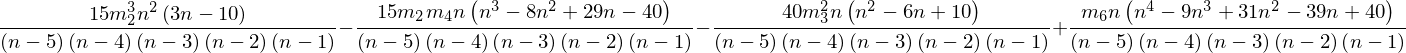

In [40]:
# Unbiased estimate for mu6
sum(list(map(factor, M6.expand().collect(m6).collect(m2*m4).collect(m3**2).collect(m2**3).args)))

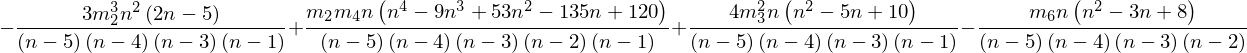

In [41]:
# Unbiased estimate for mu2*mu4
sum(list(map(factor, M2M4.expand().collect(m6).collect(m2*m4).collect(m3**2).collect(m2**3).args)))

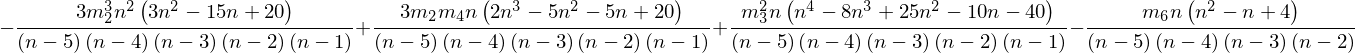

In [42]:
# Unbiased estimate for mu3**2
sum(list(map(factor, M3pow2.expand().collect(m6).collect(m2*m4).collect(m3**2).collect(m2**3).args)))

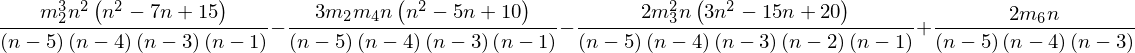

In [43]:
# Unbiased estimate for mu2**3
sum(list(map(factor, M2pow3.expand().collect(m6).collect(m2*m4).collect(m3**2).collect(m2**3).args)))